In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker


In [6]:
df = pd.read_csv("store.csv")
df.head()

date  store  item  sales
0  2013-01-01      1     1     13
1  2013-01-02      1     1     11
2  2013-01-03      1     1     14
3  2013-01-04      1     1     13
4  2013-01-05      1     1     10

In [7]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

# EDA

In [8]:
df["date"].min(),df["date"].max()

('2013-01-01', '2017-12-31')

In [9]:
df["store"].nunique()

10

In [10]:
df["item"].nunique()

50

Để khám phá dữ liệu chuỗi thời gian trước tiên chúng ta cần tổng hợp doanh số bán hàng theo ngày

In [11]:
daily_sales = df.groupby('date', as_index=False)['sales'].sum()
store_daily_sales = df.groupby(['store', 'date'], as_index=False)['sales'].sum()
item_daily_sales = df.groupby(['item', 'date'], as_index=False)['sales'].sum()

Tổng doanh số hàng ngày

In [12]:
import plotly.graph_objects as go
import plotly.io as pio

# Assuming daily_sales is a DataFrame with 'date' and 'sales' columns
daily_sales_sc = go.Scatter(x=daily_sales['date'], y=daily_sales['sales'])
layout = go.Layout(title='Tổng doanh số hàng ngày', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=[daily_sales_sc], layout=layout)

# Display the plot
pio.show(fig)

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Doanh số hàng ngày theo cửa hàng

In [ ]:
store_daily_sales_sc = []
for store in store_daily_sales['store'].unique():
    current_store_daily_sales = store_daily_sales[store_daily_sales['store'] == store]
    store_daily_sales_sc.append(go.Scatter(x=current_store_daily_sales['date'], y=current_store_daily_sales['sales'], name=f"Store {store}"))

layout = go.Layout(title='Doanh số hàng ngày theo cửa hàng', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=store_daily_sales_sc, layout=layout)

# Display the plot
pio.show(fig)

Doanh số hàng ngày theo mặt hàng

In [ ]:
item_daily_sales_sc = []
for item in item_daily_sales['item'].unique():
    current_item_daily_sales = item_daily_sales[item_daily_sales['item'] == item]
    item_daily_sales_sc.append(go.Scatter(x=current_item_daily_sales['date'], y=current_item_daily_sales['sales'], name=f"Item {item}"))

layout = go.Layout(title='Doanh số hàng ngày theo mặt hàng', xaxis=dict(title='Date'), yaxis=dict(title='Sales'))
fig = go.Figure(data=item_daily_sales_sc, layout=layout)

# Display the plot
pio.show(fig)


<AxesSubplot: >

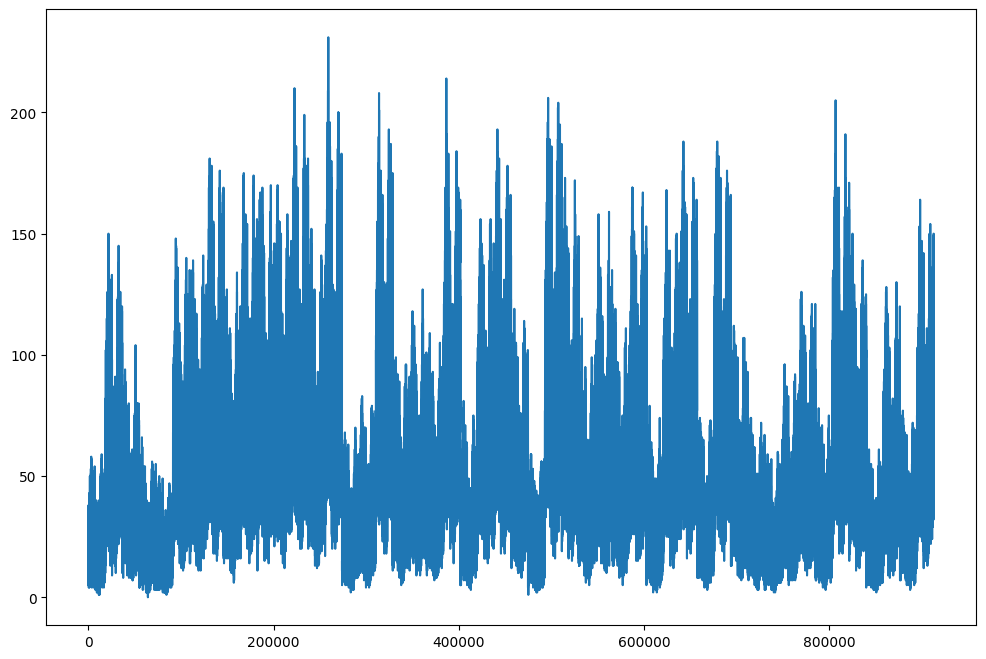

In [ ]:
df['sales'].plot(kind='line', figsize = (12,8))

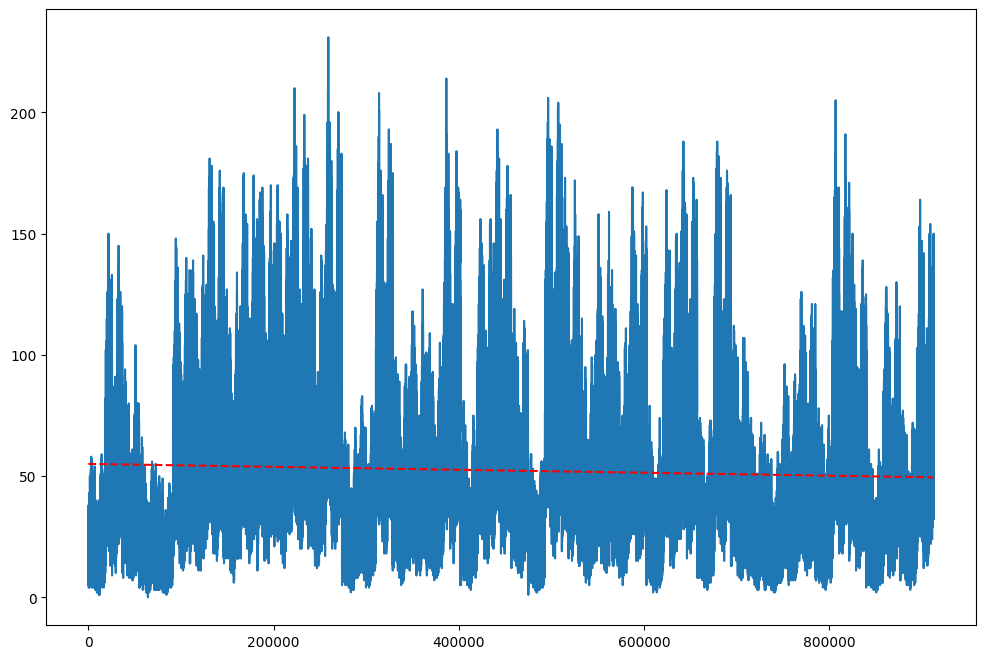

In [ ]:
df['sales'].plot(kind='line', figsize=(12, 8))

# Tính toán đường hồi quy tuyến tính (đường xu hướng)
x = np.arange(len(df))
y = df['sales'].values
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

# Vẽ đường xu hướng
plt.plot(x, p(x), "r--")

# Hiển thị biểu đồ
plt.show()

In [ ]:
data_2020 = df[df.index.date == 2016]
monthly_sales = data_2016.groupby(data_2016.index.month)['sales'].sum()
months = ['Tháng 1', 'Tháng 2', 'Tháng 3', 'Tháng 4', 'Tháng 5', 'Tháng 6', 'Tháng 7', 'Tháng 8', 'Tháng 9', 'Tháng 10', 'Tháng 11', 'Tháng 12']
sales = monthly_sales.values
num_months = len(months)
bar_width = 0.35
index = np.arange(num_months)

plt.figure(figsize=(10, 6))
bar1 = plt.bar(index, sales, bar_width, label='Doanh số')
plt.xlabel('Tháng')
plt.ylabel('Sales')
plt.title('Tổng số doanh theo tháng trong năm 2016')
plt.xticks(index + bar_width / 2, months) 
plt.legend()  

plt.tight_layout()
plt.show()

AttributeError: 'RangeIndex' object has no attribute 'date'

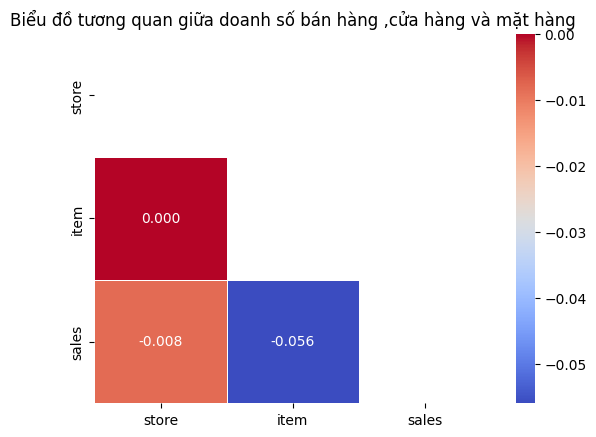

In [ ]:
data = df[['store', 'item', 'sales']]
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, cmap="coolwarm",mask=mask,square=False, linewidths=0.5,fmt='.3f')
plt.title("Biểu đồ tương quan giữa doanh số bán hàng ,cửa hàng và mặt hàng")
plt.show()

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not mo

ARIMA - RMSE: 78.33, MAE: 68.06
Prophet - RMSE: 23.29, MAE: 20.64


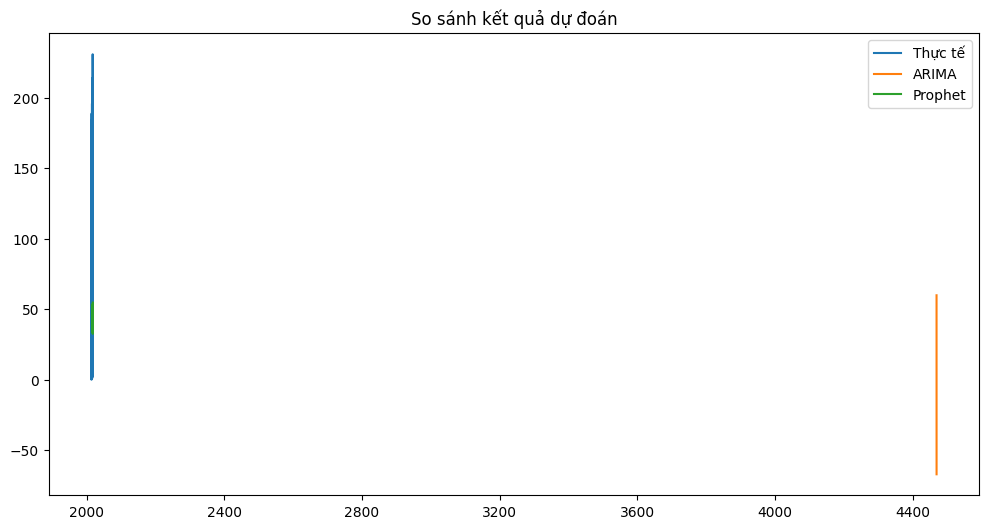

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

# 1. Chuẩn bị dữ liệu
df = pd.read_csv('store.csv', parse_dates=['date']) # Thay 'sales_data.csv' bằng tên file dữ liệu của bạn
df = df.set_index('date')

# 2. Xử lý dữ liệu (ví dụ đơn giản)
# Giả sử dữ liệu đã được xử lý missing values
# Tạo cột 'sales_diff' để làm dữ liệu stationary
df['sales_diff'] = df['sales'] - df['sales'].shift(1)
df = df.dropna()

# 3. Chia dữ liệu
train_data = df[:-30] # Lấy dữ liệu từ đầu đến trước 30 ngày cuối
test_data = df[-30:]  # Lấy 30 ngày cuối làm dữ liệu test

# 4. Xây dựng mô hình ARIMA
# (Giả sử đã xác định được p, d, q là 5, 1, 0)
model_arima = ARIMA(train_data['sales_diff'], order=(5,1,0))
model_arima_fit = model_arima.fit()

# 5. Dự đoán với ARIMA
predictions_arima = model_arima_fit.predict(start=len(train_data), end=len(df)-1)
# Chuyển đổi giá trị dự đoán về dạng ban đầu
predictions_arima = predictions_arima.cumsum() + train_data['sales'].iloc[-1]

# 6. Xây dựng mô hình Prophet
df_prophet = df[['sales']].reset_index()
df_prophet.columns = ['ds', 'y']
model_prophet = Prophet()
model_prophet.fit(df_prophet[:-30]) # Huấn luyện trên dữ liệu train

# 7. Dự đoán với Prophet
future = model_prophet.make_future_dataframe(periods=30)
predictions_prophet = model_prophet.predict(future)

# 8. Đánh giá mô hình
rmse_arima = mean_squared_error(test_data['sales'], predictions_arima, squared=False)
mae_arima = mean_absolute_error(test_data['sales'], predictions_arima)
rmse_prophet = mean_squared_error(test_data['sales'], predictions_prophet['yhat'][-30:], squared=False)
mae_prophet = mean_absolute_error(test_data['sales'], predictions_prophet['yhat'][-30:])

print(f"ARIMA - RMSE: {rmse_arima:.2f}, MAE: {mae_arima:.2f}")
print(f"Prophet - RMSE: {rmse_prophet:.2f}, MAE: {mae_prophet:.2f}")

# 9. Trực quan hóa kết quả
plt.figure(figsize=(12,6))
plt.plot(df['sales'], label='Thực tế')
plt.plot(predictions_arima, label='ARIMA')
plt.plot(predictions_prophet['ds'][-30:], predictions_prophet['yhat'][-30:], label='Prophet')
plt.legend()
plt.title('So sánh kết quả dự đoán')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=7a8dcd8a-6094-42f8-ab37-cad9a1b2dd78' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>